# Lesson 1 - What's your pet

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload      
#Reload an IPython extension 
%autoreload 2       
#reloads all modules everytime before executing the Python code
%matplotlib inline    
#plots from matplotlib will be displayed inside colab

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

#load up which supports computer vision in the fastai library and error_rate in fastai.metrics 

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [0]:
help(untar_data)
#know how the function untar_data works.

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path

#we get URLs(class) and PETS(string) from fastai finally download data and untar it

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

#know what is in the path

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations' 
path_img = path/'images'

#assert path object to each variable



The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

#the function 'get_image_files' is grab an array of all of the image files based on extension in a path.
#slice a list 0 to 4 

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_99.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_74.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_141.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_33.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_148.jpg')]

In [0]:
np.random.seed(2)
# generate you random number every time. but set up a seed the output of the function will be always the same and we set seed number to 2
pat = r'/([^/]+)_\d+.jpg$'
#search a string in the text using pattern matching methods. and the pattern is the name of jpg files

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

#return a DataBunch object to data. changes all the image sizes to 224 and get pixel values with a mean of 0 and a standard deviation of 1

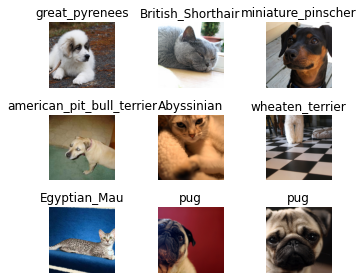

In [0]:
data.show_batch(rows=3, figsize=(5,4))


#show some of the contents in data bunch. arrange the pictures in three rows and (,) is size of blank between pictures

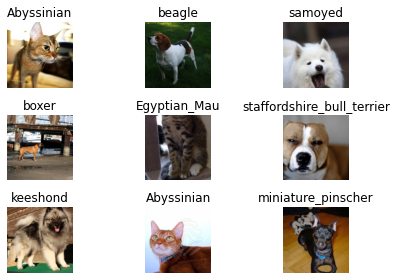

In [0]:
data.show_batch(rows=3, figsize=(6,4))

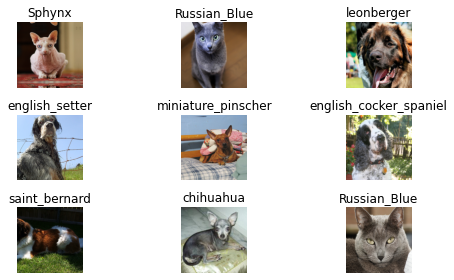

In [0]:
data.show_batch(rows=3, figsize=(7,4))

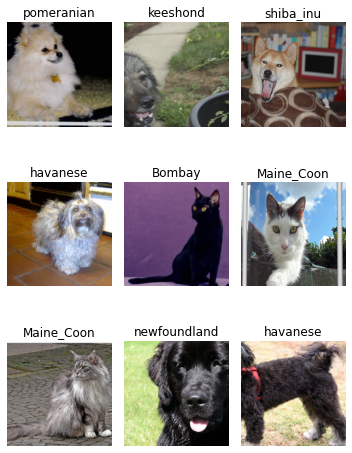

In [0]:
data.show_batch(rows=3, figsize=(5,7))

In [0]:
print(data.classes)
len(data.classes),data.c

#show data.classes and length of it. data.c is the number of classes 

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#create a learner for a convolutional neural network. models.resnet34 is architecture. and Metrics are what gets printed out error rate.

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

#learn a model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

# pass through the complete dataset. show the dataset to the model so that it can learn from it. for 4 times.

epoch,train_loss,valid_loss,error_rate,time
0,1.383426,0.312090,0.103518,01:17
1,0.610559,0.269842,0.086604,01:16
2,0.382046,0.221483,0.066306,01:17
3,0.285630,0.214049,0.069012,01:19


In [0]:
learn.save('stage-1')
#save the model

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
#Interpretation methods for classification models and This class has methods for creating confusion matrix
#This provides a confusion matrix and visualization of the most incorrect images
losses,idxs = interp.top_losses()
#largest(/smallest) losses and indexes, defaulting to all losses
len(data.valid_ds)==len(losses)==len(idxs)



True

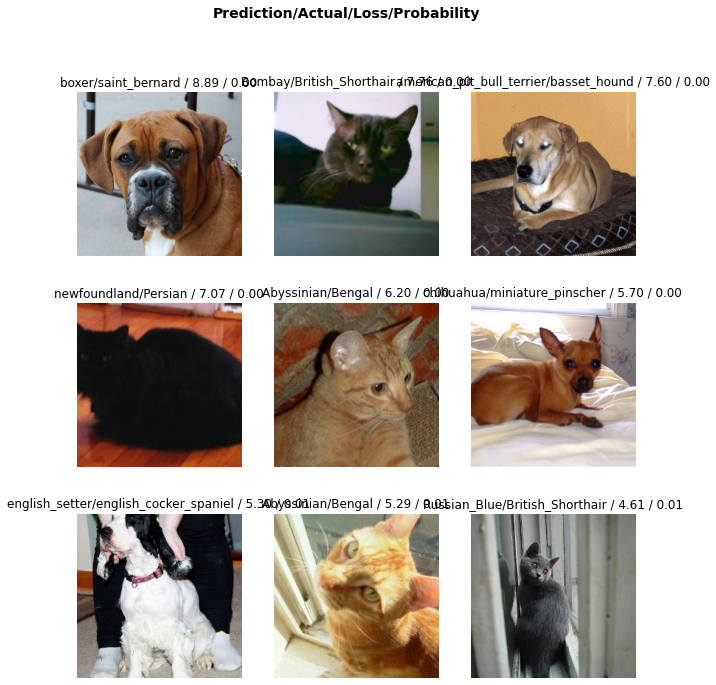

In [0]:
interp.plot_top_losses(9, figsize=(10,11))
#Show images in top_losses along with their prediction, actual, loss, and probability.

In [0]:
doc(interp.plot_top_losses)
#know what is in () and how to use it.

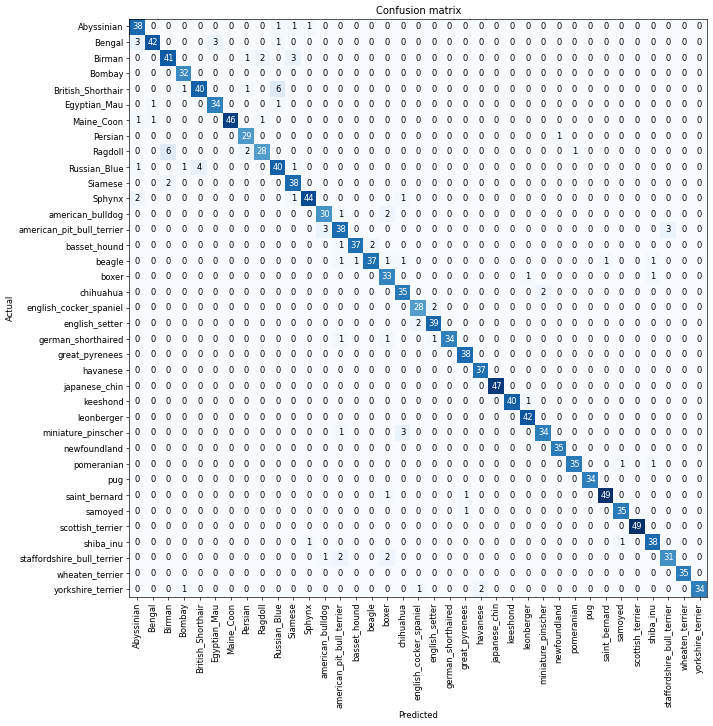

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
#plot the confusion matrix and it shows you for every actual type of dog or cat, how many times the model predicted to be of that dog or cat. 

In [0]:
interp.most_confused(min_val=2)
#grab out of the confusion matrix the most confusing combinations of predicted and actual categories. more than two times.

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 6),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Siamese', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Birman', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Siamese', 'Birman', 2),
 ('Sphynx', 'Abyssinian', 2),
 ('american_bulldog', 'boxer', 2),
 ('basset_hound', 'beagle', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'boxer', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()
#train the whole model

In [0]:
learn.fit_one_cycle(1)
#show the dataset to the model

epoch,train_loss,valid_loss,error_rate,time
0,0.637686,0.345648,0.112991,01:19


In [0]:
learn.load('stage-1');
# brings back the model that we saved earlier

In [0]:
learn.lr_find()
#run learning rate finder

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


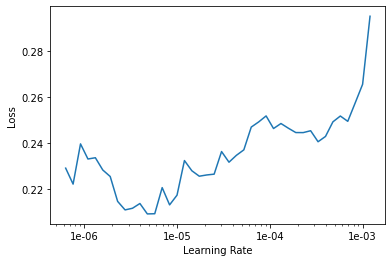

In [0]:
learn.recorder.plot()
#plot the result of our LR finder
#the learning rate gets passed 1e-03, loss gets worse.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
#train the very first layers at a learning rate of 1e-6, and the very last layers at a rate of 1e-4, and distribute all the other layers across that

epoch,train_loss,valid_loss,error_rate,time
0,0.234531,0.207350,0.063599,01:19
1,0.225814,0.204949,0.065629,01:20


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

#return a DataBunch object to data. changes all the image sizes to 299 and get pixel values with a mean of 0 and a standard deviation of 1

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

#create a learner for a convolutional neural network. models.resnet50 is architecture. and Metrics are what gets printed out error rate.

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


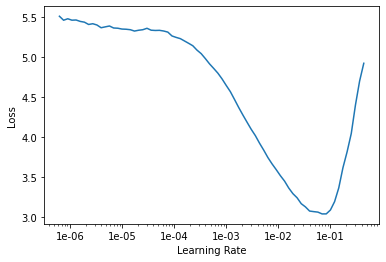

In [0]:
learn.lr_find()
#run learning rate finder
learn.recorder.plot()
#plot the result of our LR finder
#the learning rate gets passed 1e-04, loss gets worse.

In [0]:
learn.fit_one_cycle(8)
# pass through the complete dataset. show the dataset to the model so that it can learn from it. for 8 times.

epoch,train_loss,valid_loss,error_rate,time
0,0.126065,0.163425,0.053451,01:57
1,0.234486,0.225239,0.066982,01:56
2,0.255961,0.259100,0.079838,01:56
3,0.198506,0.210773,0.062923,01:56
4,0.182106,0.188311,0.055480,01:57
5,0.112312,0.153860,0.043302,01:55
6,0.086703,0.146792,0.045332,01:56
7,0.078862,0.151199,0.048714,01:56


In [0]:
learn.save('stage-1-50')
#save the model

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

#train the very first layers at a learning rate of 1e-6, and the very last layers at a rate of 1e-4, and distribute all the other layers across that

epoch,train_loss,valid_loss,error_rate,time
0,0.074544,0.147718,0.048038,01:56
1,0.067375,0.137610,0.044655,02:01
2,0.050978,0.140760,0.041272,01:57


If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');
# brings back the model that we saved earlier

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
#Interpretation methods for classification models and This class has methods for creating confusion matrix
#This provides a confusion matrix and visualization of the most incorrect images

In [0]:
interp.most_confused(min_val=2)
#grab out of the confusion matrix the most confusing combinations of predicted and actual categories. more than two times.

[('miniature_pinscher', 'chihuahua', 6),
 ('Birman', 'Ragdoll', 5),
 ('Ragdoll', 'Birman', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('British_Shorthair', 'Ragdoll', 2),
 ('american_bulldog', 'saint_bernard', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('wheaten_terrier', 'havanese', 2)]

## Other data formats

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path
#we get URLs(class) and PETS(string) from fastai finally download data and untar it

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

#return a DataBunch object to data. changes all the image sizes to 26

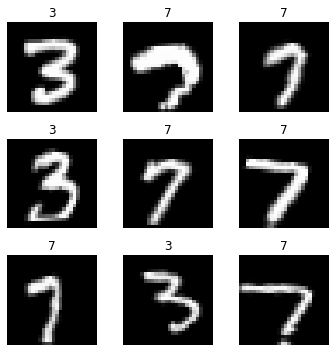

In [0]:
data.show_batch(rows=3, figsize=(5,5))

#show some of the contents in data bunch. arrange the pictures in three rows and (,) is size of blank between pictures

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
#create a learner for a convolutional neural network. models.resnet18 is architecture. and Metrics are what gets printed out error rate.
learn.fit(2)
#pass through the complete dataset. show the dataset to the model so that it can learn from it. for 2 times.

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.205326,0.089477,0.971050,00:17
1,0.112248,0.046614,0.984789,00:16


In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()
# come with a CSV file
# label are 0 or 1

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)
#use from_csv

[0, 1]

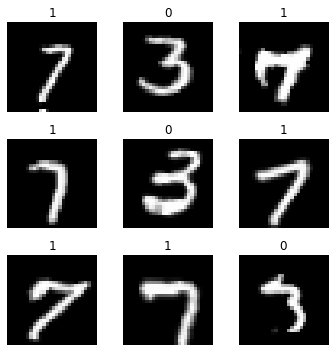

In [0]:
data.show_batch(rows=3, figsize=(5,5))
data.classes
# pass in the csv_labels

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes
#because we use csv_labels classes are 0 and 1.

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]
#take a name of path. fn_paths[0] and [1]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes
#search a string in the text using pattern matching methods.

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes
#create an arbitrary function that extracts a label from the file name or path

['3', '7']

In [63]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]
#create an array of labels. and list labels is [0] to [4]

['3', '3', '3', '3', '3']

In [64]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes
# the classes made by list is [3,7]

['3', '7']